In [2]:
import numpy as np
import pylab
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [3]:
Bins=13
Modes=5

AmpPolys=np.loadtxt("/data/ana/NuFSGenMC/MultiSim/MultisimOutputs/Gradients/Polys/EnergyAmpPolys.txt")
PhsPolys=np.loadtxt("/data/ana/NuFSGenMC/MultiSim/MultisimOutputs/Gradients/Polys/EnergyPhsPolys.txt")

In [4]:
#these to be replaced
def ReadAmpGradient(i):
    bins=np.arange(1,Bins+1)
    return np.poly1d(AmpPolys[i])(bins)


def ReadPhsGradient(i):
    bins=np.arange(1,Bins+1)
    return np.poly1d(PhsPolys[i-1])(bins)


In [5]:
AmpGradients=[]
PhsGradients=[]
for i in range(0,Modes):
    AmpGradients.append(ReadAmpGradient(i))
    if(i>0):
        PhsGradients.append(ReadPhsGradient(i))
    else:
        PhsGradients.append(0)
AllGradients=AmpGradients+PhsGradients[1:] #first phase is unphysical

In [6]:
Jacobian=np.ndarray(shape=(Bins,Modes*2-1))
for i in range(0,Bins):
    for j in range(0,Modes):
        Jacobian[i,j]=AmpGradients[j][i]
for i in range(0,Bins):
    for j in range(0,Modes-1):
        Jacobian[i,Modes+j]=PhsGradients[j+1][i]

PermissionError: [Errno 13] Permission denied: '/data/ana/NuFSGenMC/MultiSim/MultisimOutputs/Matrices/Plots/EnergyJacobain.png'

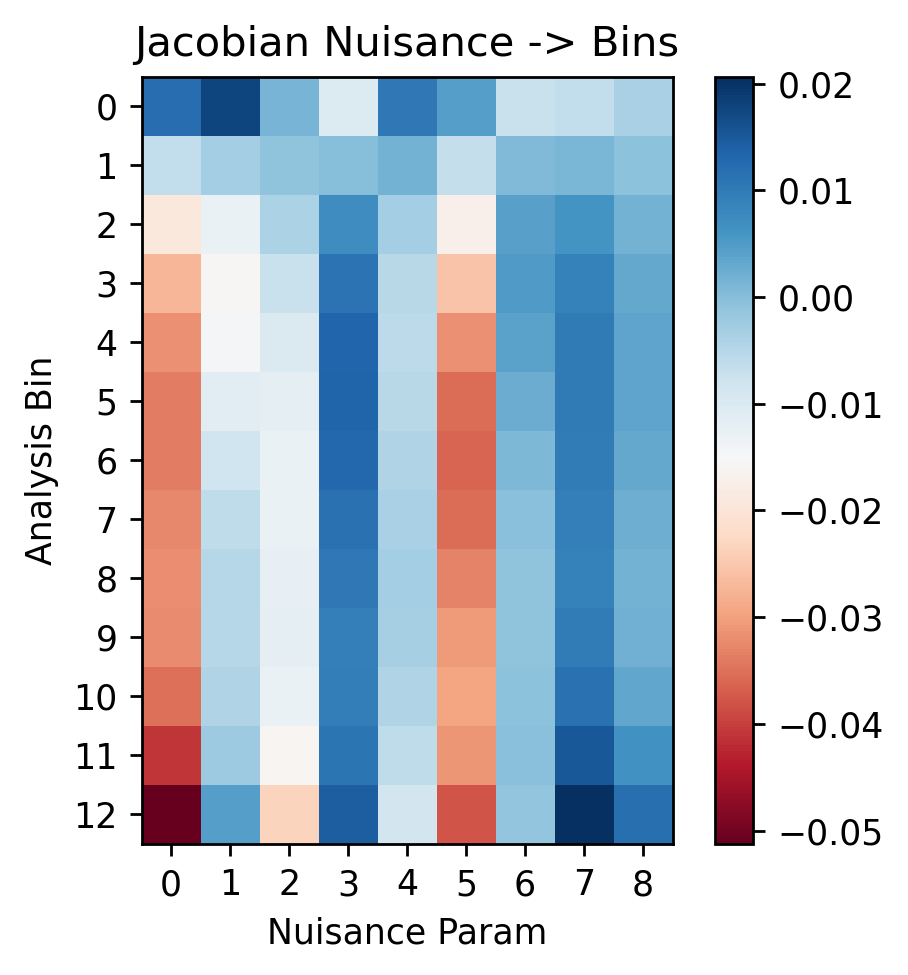

In [7]:
pylab.figure(figsize=(4,4),dpi=250)
pylab.imshow(Jacobian,interpolation='none',cmap='RdBu')
pylab.colorbar(orientation='vertical')
pylab.title("Jacobian Nuisance -> Bins")
pylab.xlabel("Nuisance Param")
pylab.ylabel("Analysis Bin")
pylab.xticks(range(0,2*Modes-1))
pylab.yticks(range(len(Jacobian)))
pylab.tight_layout()
pylab.savefig("/data/ana/NuFSGenMC/MultiSim/MultisimOutputs/Matrices/Plots/EnergyJacobain.png",dpi=250,bbox_inches='tight')

In [8]:
path="/data/ana/NuFSGenMC/MultiSim/MultisimOutputs/Constraints/Widths/"
gen1s_amp=np.loadtxt("/data/ana/NuFSGenMC/MultiSim/MultisimOutputs/Constraints/Models/models_1sig/AmpOneSigmas.txt")
gen1s_phs=np.loadtxt("/data/ana/NuFSGenMC/MultiSim/MultisimOutputs/Constraints/Models/models_1sig/PhsOneSigmas.txt")
calc1s_amp=np.loadtxt("/data/ana/NuFSGenMC/MultiSim/MultisimOutputs/Constraints/Widths/AmpWidths.txt")
calc1s_phs=np.loadtxt("/data/ana/NuFSGenMC/MultiSim/MultisimOutputs/Constraints/Widths/PhsWidths.txt")

ampamp = np.loadtxt(path+"/AmpAmpWidths.txt")
phsphs = np.loadtxt(path+"/PhsPhsWidths.txt")
ampphs = np.loadtxt(path+"/AmpPhsWidths.txt")
Matrix=np.ndarray(shape=(Modes+Modes-1,Modes+Modes-1))
Matrix=np.zeros_like(Matrix)
for i in range(0, Modes):
    for j in range(0, i):
        mask1=(ampamp[:,0]==i)*(ampamp[:,1]==j)
        Matrix[i,j]=(ampamp[mask1][0][4]-ampamp[mask1][0][2])

for i in range(1, Modes):
    for j in range(1, i):
        mask1=(phsphs[:,0]==i)*(phsphs[:,1]==j)
        Matrix[i+Modes-1,j+Modes-1]=phsphs[mask1][0][4]-phsphs[mask1][0][2]


for i in range(1, Modes):
    for j in range(0, Modes):
        mask1=(ampphs[:,0]==j)*(ampphs[:,1]==i)
        Matrix[i+Modes-1,j]=ampphs[mask1][0][4]-ampphs[mask1][0][2]
        
for i in range(0,len(Matrix)):
    for j in range(0, i):
        Matrix[j,i]=Matrix[i,j]
    Matrix[i,i]=1
#pylab.title("Full Hessian in Nuisance Space")
    

PermissionError: [Errno 13] Permission denied: '/data/ana/NuFSGenMC/MultiSim/MultisimOutputs/Matrices/Plots/WidthMatrix.png'

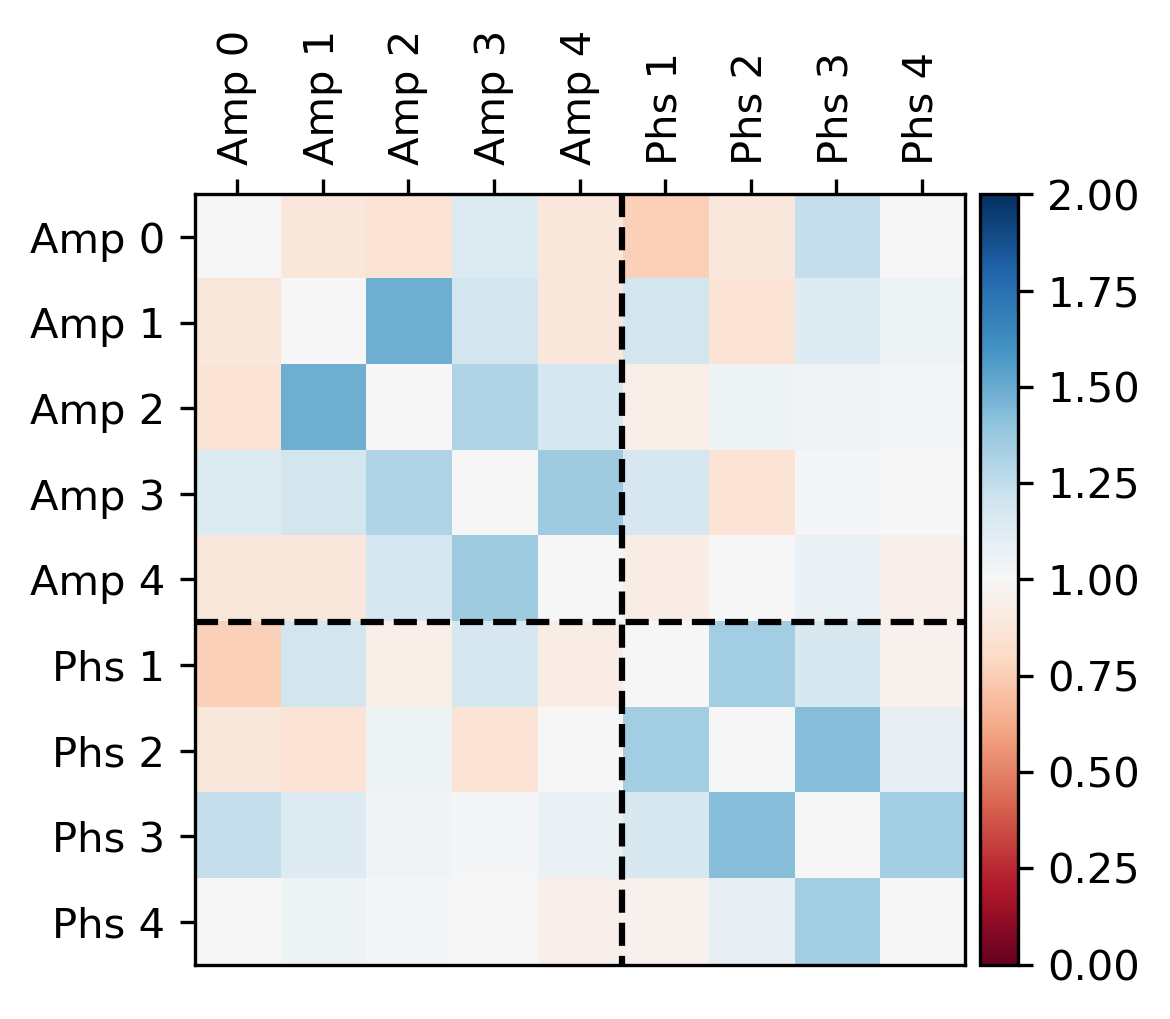

In [14]:
pylab.figure(figsize=(4,4),dpi=300)   


im =pylab.imshow(Matrix,cmap='RdBu')
pylab.clim(0,2)
pylab.plot([-0.5,2.*Modes-1.5],[Modes-0.5,Modes-0.5],'--',color='black')
pylab.plot([Modes-0.5,Modes-0.5],[-0.5,2.*Modes-1.5],'--',color='black')

XTickNames=[]
for i in range(0,Modes):
    XTickNames.append("Amp "+str(i))
for i in range(1,Modes):
    XTickNames.append("Phs "+str(i))
    
pylab.xticks(range(2*Modes-1),XTickNames,rotation=90)
pylab.yticks(range(2*Modes-1),XTickNames)
pylab.xlim(-0.5,2*Modes-1.5)
pylab.ylim(2*Modes-1.5,-0.5)
ax=pylab.gca()

ax.xaxis.tick_top()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

pylab.colorbar(im, cax=cax)
pylab.tight_layout()

pylab.savefig("/data/ana/NuFSGenMC/MultiSim/MultisimOutputs/Matrices/Plots/WidthMatrix.png",dpi=250,bbox_inches='tight')



In [16]:
Matrix

array([[1.        , 0.8834254 , 0.85988198, 1.1342199 , 0.88483726,
        0.7613751 , 0.88619288, 1.23636719, 0.99982907],
       [0.8834254 , 1.        , 1.49131455, 1.18436124, 0.88976647,
        1.18634704, 0.86365805, 1.13092065, 1.04775769],
       [0.85988198, 1.49131455, 1.        , 1.29708018, 1.16659633,
        0.93710317, 1.04754576, 1.03808098, 1.0218545 ],
       [1.1342199 , 1.18436124, 1.29708018, 1.        , 1.35449527,
        1.16454168, 0.86624869, 1.0204532 , 0.99817353],
       [0.88483726, 0.88976647, 1.16659633, 1.35449527, 1.        ,
        0.92373447, 0.9946554 , 1.06618132, 0.94793058],
       [0.7613751 , 1.18634704, 0.93710317, 1.16454168, 0.92373447,
        1.        , 1.34894099, 1.16148887, 0.95917193],
       [0.88619288, 0.86365805, 1.04754576, 0.86624869, 0.9946554 ,
        1.34894099, 1.        , 1.42198615, 1.0799976 ],
       [1.23636719, 1.13092065, 1.03808098, 1.0204532 , 1.06618132,
        1.16148887, 1.42198615, 1.        , 1.34557573],


In [10]:
Matrix**-1

array([[1.        , 1.1319575 , 1.1629503 , 0.88166324, 1.13015132,
        1.31341306, 1.12842252, 0.8088212 , 1.00017095],
       [1.1319575 , 1.        , 0.67054935, 0.84433699, 1.1238904 ,
        0.84292367, 1.15786566, 0.88423533, 0.95441915],
       [1.1629503 , 0.67054935, 1.        , 0.77096236, 0.85719453,
        1.06711836, 0.95461224, 0.96331598, 0.97861291],
       [0.88166324, 0.84433699, 0.77096236, 1.        , 0.73828238,
        0.85870692, 1.1544029 , 0.97995675, 1.00182982],
       [1.13015132, 1.1238904 , 0.85719453, 0.73828238, 1.        ,
        1.08256217, 1.00537332, 0.93792676, 1.05492957],
       [1.31341306, 0.84292367, 1.06711836, 0.85870692, 1.08256217,
        1.        , 0.74132227, 0.86096391, 1.04256596],
       [1.12842252, 1.15786566, 0.95461224, 1.1544029 , 1.00537332,
        0.74132227, 1.        , 0.70324173, 0.92592799],
       [0.8088212 , 0.88423533, 0.96331598, 0.97995675, 0.93792676,
        0.86096391, 0.70324173, 1.        , 0.74317631],


In [15]:
Matrix**-2

array([[1.        , 1.28132777, 1.3524534 , 0.77733008, 1.27724201,
        1.72505387, 1.27333739, 0.65419174, 1.00034194],
       [1.28132777, 1.        , 0.44963643, 0.71290495, 1.26312963,
        0.71052031, 1.34065288, 0.78187212, 0.91091591],
       [1.3524534 , 0.44963643, 1.        , 0.59438297, 0.73478247,
        1.13874159, 0.91128452, 0.92797768, 0.95768322],
       [0.77733008, 0.71290495, 0.59438297, 1.        , 0.54506088,
        0.73737757, 1.33264605, 0.96031523, 1.00366298],
       [1.27724201, 1.26312963, 0.73478247, 0.54506088, 1.        ,
        1.17194086, 1.01077552, 0.87970662, 1.1128764 ],
       [1.72505387, 0.71052031, 1.13874159, 0.73737757, 1.17194086,
        1.        , 0.54955871, 0.74125885, 1.08694378],
       [1.27333739, 1.34065288, 0.91128452, 1.33264605, 1.01077552,
        0.54955871, 1.        , 0.49454893, 0.85734264],
       [0.65419174, 0.78187212, 0.92797768, 0.96031523, 0.87970662,
        0.74125885, 0.49454893, 1.        , 0.55231102],


In [11]:
NuisHessian=np.ones_like(Matrix)
for i in range(0,2*Modes-1):
    for j in range(0,2*Modes-1):
        if (i != j ):
            NuisHessian[i,j]= Matrix[i,j]**-2-1.

PermissionError: [Errno 13] Permission denied: '/data/ana/NuFSGenMC/MultiSim/MultisimOutputs/Matrices/Plots/HessianMatrix.png'

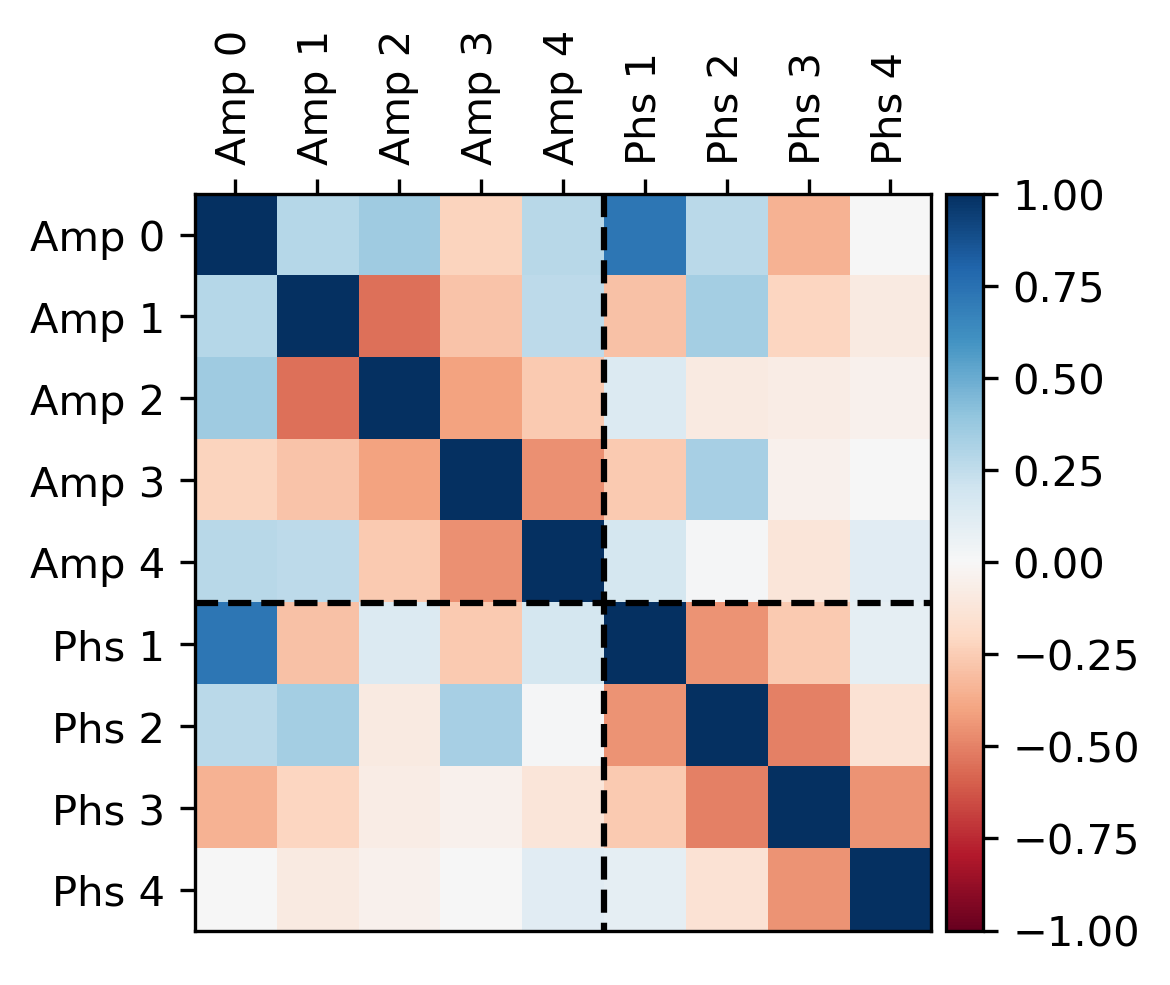

In [13]:
pylab.figure(figsize=(4,4),dpi=300)   


im =pylab.imshow(NuisHessian,cmap='RdBu')
pylab.clim(-1,1)
pylab.plot([-0.5,2.*Modes-1.5],[Modes-0.5,Modes-0.5],'--',color='black')
pylab.plot([Modes-0.5,Modes-0.5],[-0.5,2.*Modes-1.5],'--',color='black')

XTickNames=[]
for i in range(0,Modes):
    XTickNames.append("Amp "+str(i))
for i in range(1,Modes):
    XTickNames.append("Phs "+str(i))
    
pylab.xticks(range(2*Modes-1),XTickNames,rotation=90)
pylab.yticks(range(2*Modes-1),XTickNames)
pylab.xlim(-0.5,2*Modes-1.5)
pylab.ylim(2*Modes-1.5,-0.5)
ax=pylab.gca()

ax.xaxis.tick_top()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

pylab.colorbar(im, cax=cax)
pylab.tight_layout()

pylab.savefig("/data/ana/NuFSGenMC/MultiSim/MultisimOutputs/Matrices/Plots/HessianMatrix.png",dpi=250,bbox_inches='tight')



In [ ]:
CovNuis=np.linalg.inv(NuisHessian)

In [ ]:
np.transpose(np.transpose(Priors*CovNuis)*Priors)

In [ ]:
pylab.figure(figsize=(4,4),dpi=300)   


im =pylab.imshow(CovNuis,cmap='RdBu')
pylab.clim(-10,10)
pylab.plot([-0.5,2.*Modes-1.5],[Modes-0.5,Modes-0.5],'--',color='black')
pylab.plot([Modes-0.5,Modes-0.5],[-0.5,2.*Modes-1.5],'--',color='black')

XTickNames=[]
for i in range(0,Modes):
    XTickNames.append("Amp "+str(i))
for i in range(1,Modes):
    XTickNames.append("Phs "+str(i))
    
pylab.xticks(range(2*Modes+1),XTickNames,rotation=90)
pylab.yticks(range(2*Modes+1),XTickNames)
pylab.xlim(-0.5,2*Modes-1.5)
pylab.ylim(2*Modes-1.5,-0.5)
ax=pylab.gca()

ax.xaxis.tick_top()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

pylab.colorbar(im, cax=cax)
pylab.tight_layout()

pylab.savefig("/data/ana/NuFSGenMC/MultiSim/MultisimOutputs/Matrices/Plots/NuisanceCovariance.png",dpi=250,bbox_inches='tight')




In [ ]:
CovBins=Jacobian.dot(CovNuis).dot(np.transpose(Jacobian))

In [ ]:
pylab.figure(figsize=(4,4),dpi=300)   
im =pylab.imshow(CovBins,interpolation='nearest',cmap='RdBu')

pylab.clim(-np.max(np.abs(CovBins)),np.max(np.abs(CovBins)))
pylab.xlabel("Energy Bin")
pylab.ylabel("Energy Bin")


ax=pylab.gca()
pylab.xticks(range(len(CovBins)))
pylab.yticks(range(len(CovBins)))
ax.xaxis.tick_top()
ax.xaxis.label_position='top'
ax.xaxis.labelpad=15
pylab.xlim(-0.5,12.5)
pylab.ylim(12.5,-0.5)




divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

pylab.colorbar(im, cax=cax)
pylab.tight_layout()

pylab.savefig("/data/ana/NuFSGenMC/MultiSim/MultisimOutputs/Matrices/Plots/BinnedCovariance.png",dpi=250,bbox_inches='tight')




In [ ]:
pylab.savetxt("/data/ana/NuFSGenMC/MultiSim/MultisimOutputs/Matrices/NuisanceCovariance.txt",CovNuis)
pylab.savetxt("/data/ana/NuFSGenMC/MultiSim/MultisimOutputs/Matrices/AnalysisCovariance.txt",CovBins)

In [ ]:
CovMatrixNew=numpy.diag(1./numpy.diag(HessianHeseToys))

In [ ]:
pylab.plot(numpy.diag(HessianHeseToys))

In [ ]:
numpy.diag(HessianHeseToys)[11]

In [ ]:
pylab.figure(figsize=(5,5),dpi=200)
pylab.plot(numpy.sqrt(numpy.diag(CovBinsHese)),label='HESE Toys')
pylab.plot(numpy.sqrt(numpy.diag(CovBins)),label='Multisim')
pylab.legend(loc='upper right')
pylab.ylim(0,0.1)
pylab.ylabel("Uncertainty")
pylab.xlabel("MEOWS Energy Bin")


In [ ]:
CovHeseIceEllipse=numpy.zeros_like(CovNuisHeseToys)
CovHeseIceEllipse[0,0]=((numpy.log10(1.1*1.0)/2.)**2/0.0100164210622**2)

In [ ]:
pylab.figure(figsize=(5,5),dpi=200)
pylab.imshow(CovHeseIceEllipse,cmap='RdBu')
pylab.clim(-5,5)
pylab.colorbar()
pylab.title("Nuisance Covariance")
pylab.xlabel("Nuisance1")
pylab.ylabel("Nuisance2")

In [ ]:
TotalCovHese=CovHeseIceEllipse+CovNuisHeseToys
CovBinsHeseEllipse=Jacobian.dot(CovHeseIceEllipse).dot(numpy.transpose(Jacobian))
CovBinsHeseTotal=Jacobian.dot(TotalCovHese).dot(numpy.transpose(Jacobian))




In [ ]:
pylab.imshow(CovBinsHeseTotal,interpolation='nearest',cmap='RdBu')
pylab.colorbar()
#pylab.clim(-numpy.max(numpy.abs(CovBins)),numpy.max(numpy.abs(CovBins)))
pylab.clim(-numpy.max(numpy.abs(CovBinsHeseTotal)),numpy.max(numpy.abs(CovBinsHeseTotal)))
pylab.xlabel("Analysis Bin")
pylab.ylabel("Analysis Bin")
pylab.title("Covariance in Binned Space")

In [ ]:
pylab.imshow(CovBinsHese,interpolation='nearest',cmap='RdBu')
pylab.colorbar()
#pylab.clim(-numpy.max(numpy.abs(CovBins)),numpy.max(numpy.abs(CovBins)))
pylab.clim(-numpy.max(numpy.abs(CovBinsHeseTotal)),numpy.max(numpy.abs(CovBinsHeseTotal)))
pylab.xlabel("Analysis Bin")
pylab.ylabel("Analysis Bin")
pylab.title("Covariance in Binned Space")

In [ ]:
pylab.figure(figsize=(5,5),dpi=200)
pylab.plot(numpy.sqrt(numpy.diag(CovBinsHese)),label='HESE Toys')
pylab.plot(numpy.sqrt(numpy.diag(CovBinsHeseEllipse)),label='HESE Ellipse')
pylab.plot(numpy.sqrt(numpy.diag(CovBinsHeseTotal)),label='HESE Sum')
pylab.plot(numpy.sqrt(numpy.diag(CovBins)),label='Multisim, Default')
pylab.plot(numpy.sqrt(numpy.diag(CovBins))*0.76,'--',label='Multisim, Dima Threshold',color='DarkRed')
pylab.xlabel("MEOWS Energy Bin")
pylab.ylabel("Uncertainty ")
pylab.ylim(0,0.12)
pylab.legend(loc='upper left',ncol=2)

In [ ]:
gen1s=np.loadtxt("/data/ana/NuFSGenMC/MultiSim/MultisimOutputs/Constraints/Models/models_1sig/AmpOneSigmas.txt")
calc1s=np.loadtxt("/data/ana/NuFSGenMC/MultiSim/MultisimOutputs/Constraints/Widths/AmpWidths.txt")

In [ ]:
pylab.plot(calc1s[:,0],(calc1s[:,3]-calc1s[:,1])/(gen1s[:,3]-gen1s[:,1]),'o')
#pylab.plot(gen1s[:,0],gen1s[:,3]-gen1s[:,1],'.')
#pylab.ylim(0,0.25)

In [ ]:
gen1s=np.loadtxt("/data/ana/NuFSGenMC/MultiSim/MultisimOutputs/Constraints/Models/models_1sig/PhsOneSigmas.txt")
calc1s=np.loadtxt("/data/ana/NuFSGenMC/MultiSim/MultisimOutputs/Constraints/Widths/PhsWidths.txt")
pylab.plot(calc1s[:,0],(calc1s[:,3]-calc1s[:,1])/(gen1s[:,3]-gen1s[:,1]),'o')



In [ ]:
calc1s

In [ ]:
CorrFactor